In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [18]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return np.sin(x)

In [19]:
# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

In [20]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

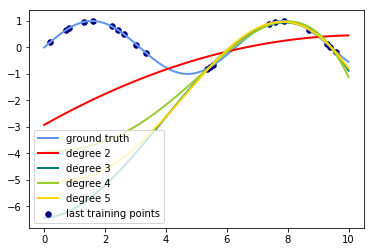

In [30]:
# sklearn model: PolynomialFeatures + Ridge
colors = ['red', 'teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="last training points")

for count, degree in enumerate([2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X[-10:], y[-10:])
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [22]:
# Numpy: polyfit
np.polyfit(X.ravel(), y, 3)

array([-0.00319473,  0.07251884, -0.47637989,  1.04714529])

In [23]:
# All values
p3 = np.poly1d(np.polyfit(X.ravel(), y, 3))

In [24]:
print(np.polyfit(X.ravel(), y, 3))

[-0.00319473  0.07251884 -0.47637989  1.04714529]


In [25]:
print(p3)

           3           2
-0.003195 x + 0.07252 x - 0.4764 x + 1.047


In [26]:
# Last 10 values
print(np.polyfit(X[-10:].ravel(), y[-10:], 3))

[ -0.01774783   0.07257049   2.12313348 -11.5885552 ]


In [27]:
# First 10 values
print(np.polyfit(X[:10].ravel(), y[:10], 3))

[ 0.02670577 -0.53497184  1.44997965 -0.0900374 ]


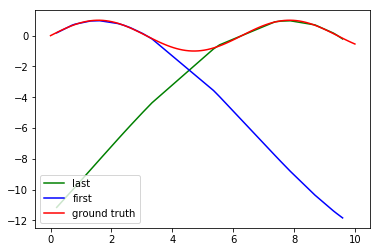

In [29]:
plt.plot(X, np.poly1d(np.polyfit(X[-10:].ravel(), y[-10:], 3))(X), color='g', label="last")
plt.plot(X, np.poly1d(np.polyfit(X[:10].ravel(), y[:10], 3))(X), color='b', label="first")
plt.plot(x_plot, f(x_plot), color='r', label="ground truth")
plt.legend(loc='lower left')
plt.show()